Az eredeti kepek:


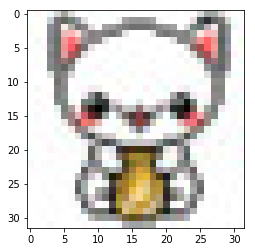

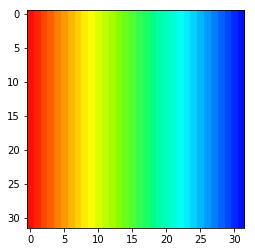

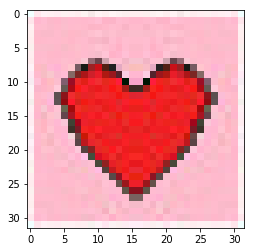

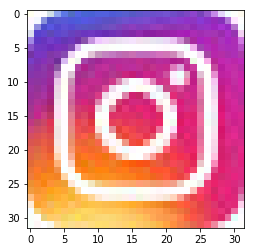

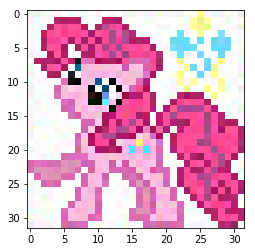

[[[252 255 255]
  [254 249 246]
  [255 255 251]
  ..., 
  [255 248 248]
  [254 255 253]
  [255 251 255]]

 [[252 255 255]
  [255 254 250]
  [254 255 251]
  ..., 
  [211 212 206]
  [242 255 253]
  [252 253 255]]

 [[251 255 250]
  [255 254 247]
  [253 255 252]
  ..., 
  [144 146 141]
  [239 250 246]
  [255 250 255]]

 ..., 
 [[255 255 255]
  [254 254 254]
  [252 252 252]
  ..., 
  [252 252 252]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [252 252 252]
  ..., 
  [255 255 255]
  [255 255 255]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [251 251 251]
  [255 255 255]
  [253 253 253]]]
A cat.jpg kepen az atlag az R csatornan 208.585938, az szoras 60.950419
A cat.jpg kepen az atlag az G csatornan 203.217773, az szoras 65.124224
A cat.jpg kepen az atlag az B csatornan 198.659180, az szoras 71.312226
[[[252  15   0]
  [255  38   0]
  [255  69   0]
  ..., 
  [  1  71 254]
  [  1  40 255]
  [  0  15 253]]

 [[252  15   0]
  [255  38   0]
  [

/home/fbenedek/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


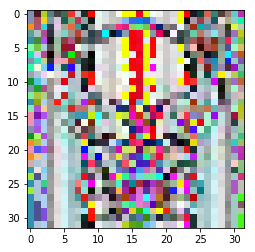

A gradient.jpg kep atalakitva:
A kep R csatornajan a szoras 0.000000, a varhatoertek 0.000000
A kep G csatornajan a szoras 0.000000, a varhatoertek 0.000000
A kep B csatornajan a szoras 0.000000, a varhatoertek 0.000000


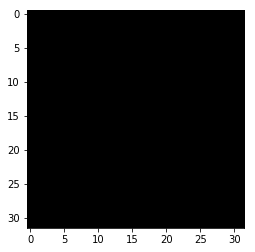

A heart.jpg kep atalakitva:
A kep R csatornajan a szoras 1.000000, a varhatoertek 0.000000
A kep G csatornajan a szoras 1.000000, a varhatoertek 0.000000
A kep B csatornajan a szoras 1.000000, a varhatoertek 0.000000


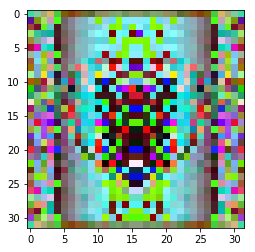

A insta.jpg kep atalakitva:
A kep R csatornajan a szoras 1.000000, a varhatoertek -0.000000
A kep G csatornajan a szoras 1.000000, a varhatoertek 0.000000
A kep B csatornajan a szoras 1.000000, a varhatoertek 0.000000


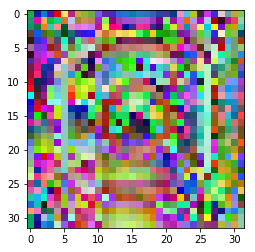

A pinkie.jpg kep atalakitva:
A kep R csatornajan a szoras 1.000000, a varhatoertek -0.000000
A kep G csatornajan a szoras 1.000000, a varhatoertek -0.000000
A kep B csatornajan a szoras 1.000000, a varhatoertek 0.000000


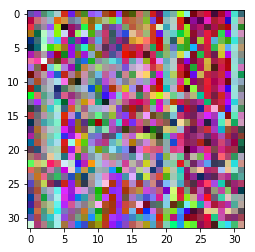

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler

#képek beolvasása

imgname=['cat.jpg','gradient.jpg','heart.jpg','insta.jpg','pinkie.jpg']
print("Az eredeti kepek:") #eredeti képek megjelítése matplotlibbel és beolvasása az images[] tömbbe
images=[]
for i in range (5):
    images.append((mpimg.imread(imgname[i]))) #hozzádom a tömkbhöz
    plt.imshow(images[i]) #megjelenítés
    plt.show()



mean=np.zeros((5,3)) #átlagok tárolására 
deviation=np.zeros((5,3)) #szórások tárolására
rgb=['R','G','B'] 
for j in range (5):
    print(images[j]) #j-edik kép nyomtatása np arrayként
    for i in range (3):
        mean[j][i]=images[j][:,:,i].mean() #pixelek átlaga a j-edik kép i-edik csatornáján
        deviation[j][i]=np.std(images[j][:,:,i]) #pixelek szórása a j-edik kép i-edik csatornáján
        print("A %s kepen az atlag az %s csatornan %f, az szoras %f" %(imgname[j],rgb[i], mean[j][i], deviation[j][i]))

#átalakítás 0 várhatóértékű, 1 szórású adathalmazzá
scaler=StandardScaler()
img_scaled=np.zeros((32,32,3,5), dtype=np.float) #scaled kép mátrixának feltöltése 
for j in range (5):
    print("A %s kep atalakitva:" %(imgname[j]))
    for i in range (3):
        scaler.fit(images[j][:,:,i]) #eredeti átlag és szórás kiszámítása a .transform()-hoz
        img_scaled[:,:,i,j]=scaler.transform(images[j][:,:,i]) #scaler alkalmazása a j-edik kép i-edik csatornájára
        print("A kep %s csatornajan a szoras %f, a varhatoertek %f" %(rgb[i], np.std(img_scaled[:,:,i,j]), img_scaled[:,:,i,j].mean()))
    plt.imshow(img_scaled[:,:,:,j]) #átalakított kép megjelenítése
    plt.show()

/home/fbenedek/anaconda3/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


A spektrogram:


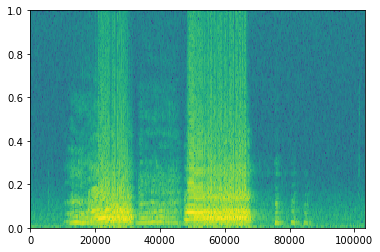

In [26]:
from scipy.io.wavfile import read #wav beolvasáshoz

audio_name='sikoly.wav'
audio=read(audio_name) # hangfájl beolvasása
sound=np.array(audio[1], dtype=float) #átalakítás np array-ba
print("A spektrogram:")
plt.specgram(sound, 256, 2,0) #spektogram sound-ból
plt.show() #hibaüzenet a metadata miatt


In [3]:
#web scrap
from urllib.request import urlopen #html lekérdezéshez
from bs4 import BeautifulSoup #html felbontásához
from bs4.element import Comment #html szűrésére
from collections import OrderedDict
import string

page='http://www.snopes.com/facebook-ai-developed-own-language/' #oldal címe
html=urlopen(page).read() #oldal html kódjának beolvasása

#szöveges tartalom: stack overflow-ról eltulajdonítva
def tag_visible(element): #függvény a látható tartalom megtalálására
    #ezek nem láthatóak:
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']: 
        return False
    if isinstance(element, Comment):
        return False
    #többi tartalom látható
    return True

def text_from_html(body): #függvény a html->string átalakításhoz
    soup = BeautifulSoup(body, 'html.parser') #felbontás
    texts = soup.findAll(text=True) #összes szöveges tartalom
    visible_texts = filter(tag_visible, texts)   #látható tartalom szűrése a tag_visible fg-el
    return u" ".join(t.strip() for t in visible_texts)

#szöveges tartalom megjelenítése
only_text=text_from_html(html)
print(only_text)







        Connect with Snopes      TOP TAGS:   ASP Article donald trump barack obama hillary clinton Not Necessarily The News animals election 2016 fake news politics music hoaxes facebook Movies something for nothing Radio & TV Television           What’s New  Hot 50  Fact Check  News  Video  Archive  About  FAQ  Contact  Random                                        What's New    Hot 50    Fact Check    News    Video      Archive    Automobiles    Business    Cokelore    College    Computers    Crime    Critter Country    Disney    Embarrassments    Fauxtography    Food    Fraud & Scams    Glurge Gallery    History    Holidays    Horrors    Inboxer Rebellion    Language    Legal Affairs    Lost Legends    Love    Media Matters    Medical    Military    Questionable Quotes    Racial Rumors    Radio & TV    Religion    Risqué Business    Science    September 11th    Sports    Travel    Weddings      About    FAQ    Contact    Random                 Automobiles  Business  Cokelore  Colleg

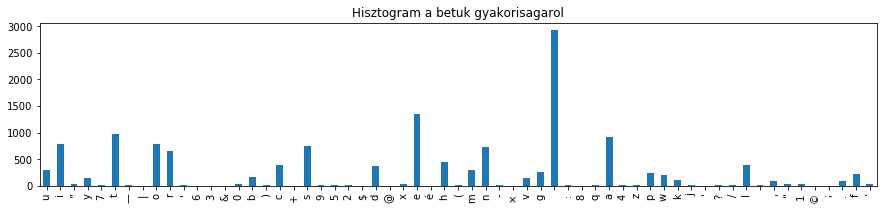

In [28]:

from collections import Counter

#hisztogram a betűk gyakoriságáról
only_text=only_text.lower() #lowercase-ben 
list_text=[]
for c in only_text:
    list_text.append(c) #only_text-ből list
letter_counts = Counter(list_text) #betűk megszámlálása


df = pandas.DataFrame.from_dict(letter_counts, orient='index') #dataframe készítése a list-ből
df.plot(kind='bar', figsize=(15,3), title='Hisztogram a betuk gyakorisagarol', legend=False) #plottolás
plt.show()
